In [163]:
#import required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [164]:
# Read data
df = pd.read_csv("data.csv", sep=";",encoding='ISO-8859-1', doublequote=False, skipinitialspace=True)

# Display the first few rows of the DataFrame
df.head()

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
0,2,2,71,3,3,2,right ocular pain,1,1,2,...,36.6,100,2,Corneal abrasion,1,4,2,86,"5,00",1
1,1,1,56,12,3,2,right forearm burn,1,1,2,...,36.5,NaN,4,"Burn of hand, firts degree dorsum",1,5,4,64,"3,95",1
2,2,1,68,8,2,2,"arm pain, Lt",1,1,2,...,36.6,98,4,"Fracture of surgical neck of humerus, closed",2,5,4,862,"1,00",1
3,1,2,71,8,1,1,ascites tapping,1,1,3,...,36.5,NaN,4,Alcoholic liver cirrhosis with ascites,1,5,6,108,"9,83",1
4,1,2,58,4,3,1,"distension, abd",1,1,3,...,36.5,NaN,4,Ascites,1,5,8,109,"6,60",1


In [165]:
df.shape

(1267, 24)

In [166]:
df.columns

Index(['Group', 'Sex', 'Age', 'Patients number per hour', 'Arrival mode',
       'Injury', 'Chief_complain', 'Mental', 'Pain', 'NRS_pain', 'SBP', 'DBP',
       'HR', 'RR', 'BT', 'Saturation', 'KTAS_RN', 'Diagnosis in ED',
       'Disposition', 'KTAS_expert', 'Error_group', 'Length of stay_min',
       'KTAS duration_min', 'mistriage'],
      dtype='object')

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Group                     1267 non-null   int64 
 1   Sex                       1267 non-null   int64 
 2   Age                       1267 non-null   int64 
 3   Patients number per hour  1267 non-null   int64 
 4   Arrival mode              1267 non-null   int64 
 5   Injury                    1267 non-null   int64 
 6   Chief_complain            1267 non-null   object
 7   Mental                    1267 non-null   int64 
 8   Pain                      1267 non-null   int64 
 9   NRS_pain                  1267 non-null   object
 10  SBP                       1267 non-null   object
 11  DBP                       1267 non-null   object
 12  HR                        1267 non-null   object
 13  RR                        1267 non-null   object
 14  BT                      

In [168]:
import numpy as np

# List of columns to convert
cols_to_convert = ['SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturation']

# Replace '??' with NaN and convert to float
for col in cols_to_convert:
    df[col] = df[col].replace('??', np.nan).astype(float)

# Now check the data types
print(df.dtypes)


Group                         int64
Sex                           int64
Age                           int64
Patients number per hour      int64
Arrival mode                  int64
Injury                        int64
Chief_complain               object
Mental                        int64
Pain                          int64
NRS_pain                     object
SBP                         float64
DBP                         float64
HR                          float64
RR                          float64
BT                          float64
Saturation                  float64
KTAS_RN                       int64
Diagnosis in ED              object
Disposition                   int64
KTAS_expert                   int64
Error_group                   int64
Length of stay_min            int64
KTAS duration_min            object
mistriage                     int64
dtype: object


In [169]:
def missing_values_table(dataframe):
    variables_with_na = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[variables_with_na].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[variables_with_na].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df)
    return variables_with_na

df['NRS_pain'] = df[["NRS_pain"]].replace("#BOÞ!",np.NaN)



missing_values_table(df)

                 n_miss  ratio
Saturation          697  55.01
NRS_pain            556  43.88
DBP                  29   2.29
SBP                  25   1.97
RR                   22   1.74
HR                   20   1.58
BT                   18   1.42
Diagnosis in ED       2   0.16


['NRS_pain', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturation', 'Diagnosis in ED']

In [170]:
#filling Nan values with median
print(df['BT'].median())
df['BT'] = df['BT'].fillna(36.5)

36.5


In [171]:
#filling Nan values with median
print(df['RR'].median())
df['RR'] = df['RR'].fillna(36.5)

20.0


In [172]:
#filling Nan values with median
print(df['HR'].median())
df['HR'] = df['HR'].fillna(36.5)

82.0


In [173]:
#filling Nan values with median
print(df['BT'].median())
df['BT'] = df['BT'].fillna(36.5)

36.5


In [174]:
df.groupby('Group').count()

,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,SBP,...,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
Group,,,,,,,,,,,,,,,,,,,,,
1,688,688,688,688,688,688,688,688,370,670,...,688,0,688,688,688,688,688,688,688,688
2,579,579,579,579,579,579,579,579,341,572,...,579,570,579,577,579,579,579,579,579,579


In [175]:
df["Saturation"] = df.groupby(["mistriage", "KTAS_expert"])["Saturation"].transform(lambda x: x.fillna(x.mode()[0]))

In [176]:
missing_values_table(df)

                 n_miss  ratio
NRS_pain            556  43.88
DBP                  29   2.29
SBP                  25   1.97
Diagnosis in ED       2   0.16


['NRS_pain', 'SBP', 'DBP', 'Diagnosis in ED']

In [177]:
df.loc[(df['SBP'] <=70), ['SBP', 'DBP']]

,SBP,DBP
122,50.0,33.0
123,50.0,33.0
133,65.0,45.0
153,70.0,NaN
968,60.0,NaN
971,70.0,NaN
1054,60.0,NaN
1131,70.0,40.0
1205,70.0,40.0


In [178]:
df.loc[(df['SBP'] <= 70), 'DBP'].mean()

38.2

In [179]:
#Filling DBP where only SBP is present. Median of this group's SBP is considerably lower. Using the median DBP of SBP's less than 70
df.loc[(df['DBP'].isnull()) & (df['SBP'].notnull()), 'DBP'] = [38.2 for x in df.loc[(df['DBP'].isnull()) & \
                                                   (df['SBP'].notnull()), 'SBP']]

In [180]:
df['DBP'].median()

80.0

In [181]:
df['SBP'].median()

130.0

In [182]:
#Filling the rest of DBP and SBP with median
df['DBP'] = df['DBP'].fillna(80)
df['SBP'] = df['SBP'].fillna(130)

In [183]:
df['NRS_pain'].unique()

array(['2', '3', '4', '5', '6', '8', '9', nan, '1', '7', '10'],
      dtype=object)

In [184]:
#Filling pain_scale nan with 0 if no pain present
df['NRS_pain'] = df['NRS_pain'].fillna(0)

In [185]:
df.describe()

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Mental,Pain,SBP,DBP,HR,RR,BT,Saturation,KTAS_RN,Disposition,KTAS_expert,Error_group,Length of stay_min,mistriage
count,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000
mean,1.456985,1.521705,54.423836,7.519337,2.820837,1.192581,1.105762,0.563536,133.576953,79.653354,83.213891,19.801894,36.579479,97.269140,3.335438,1.609313,3.265983,0.558011,11016.102605,0.250197
std,0.498343,0.499726,19.725033,3.160563,0.807904,0.394482,0.447768,0.496143,27.009758,15.160456,17.540700,2.987834,0.541899,3.902972,0.885391,1.157983,0.885803,1.571489,80446.092065,0.628250
min,1.000000,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,0.000000,50.000000,31.000000,32.000000,14.000000,35.000000,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,37.000000,5.000000,2.000000,1.000000,1.000000,0.000000,115.000000,70.000000,72.000000,18.000000,36.200000,98.000000,3.000000,1.000000,3.000000,0.000000,133.000000,0.000000
50%,1.000000,2.000000,57.000000,7.000000,3.000000,1.000000,1.000000,1.000000,130.000000,80.000000,81.000000,20.000000,36.500000,98.000000,3.000000,1.000000,3.000000,0.000000,274.000000,0.000000
75%,2.000000,2.000000,71.000000,10.000000,3.000000,1.000000,1.000000,1.000000,150.000000,90.000000,96.000000,20.000000,36.800000,98.000000,4.000000,2.000000,4.000000,0.000000,606.500000,0.000000
max,2.000000,2.000000,96.000000,17.000000,7.000000,2.000000,4.000000,1.000000,275.000000,160.000000,148.000000,36.500000,41.000000,100.000000,5.000000,7.000000,5.000000,9.000000,709510.000000,2.000000


In [186]:
df.columns

Index(['Group', 'Sex', 'Age', 'Patients number per hour', 'Arrival mode',
       'Injury', 'Chief_complain', 'Mental', 'Pain', 'NRS_pain', 'SBP', 'DBP',
       'HR', 'RR', 'BT', 'Saturation', 'KTAS_RN', 'Diagnosis in ED',
       'Disposition', 'KTAS_expert', 'Error_group', 'Length of stay_min',
       'KTAS duration_min', 'mistriage'],
      dtype='object')

In [187]:
#Disposition 
#[1 = Dischange, 2 = Admission to ward, 3 = Admission to ICU, 4 = Disharge, 5 = Transfer, 6 = Death, 7 = Surgery]
df['Disposition'].unique()

array([1, 2, 5, 7, 6, 3, 4], dtype=int64)

In [188]:
# Group results column based on whether the patient is admitted to the hospital or not
df['Disposition'] = df['Disposition'].replace({1:0, 2:1, 5:1, 7:1, 6:0,
                                              3:1, 4:0})


In [189]:
df['Disposition'].unique()

array([0, 1], dtype=int64)

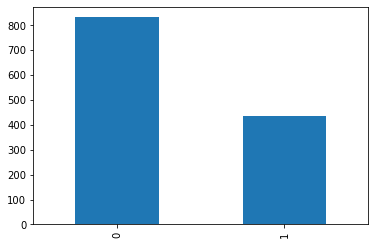

In [190]:
df['Disposition'].value_counts().plot(kind='bar')

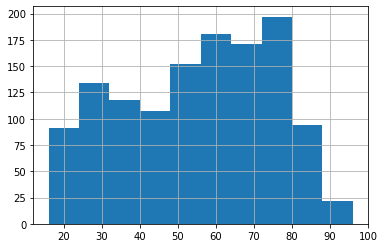

In [191]:
df['Age'].hist()

In [192]:
#female=1, Male=2 >>> change it to Female =0 Male=1

df['Sex'] = df['Sex'].replace({1:0, 2:1})


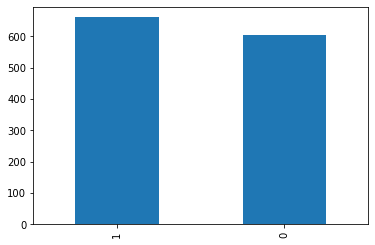

In [193]:
df['Sex'].value_counts().plot(kind='bar')

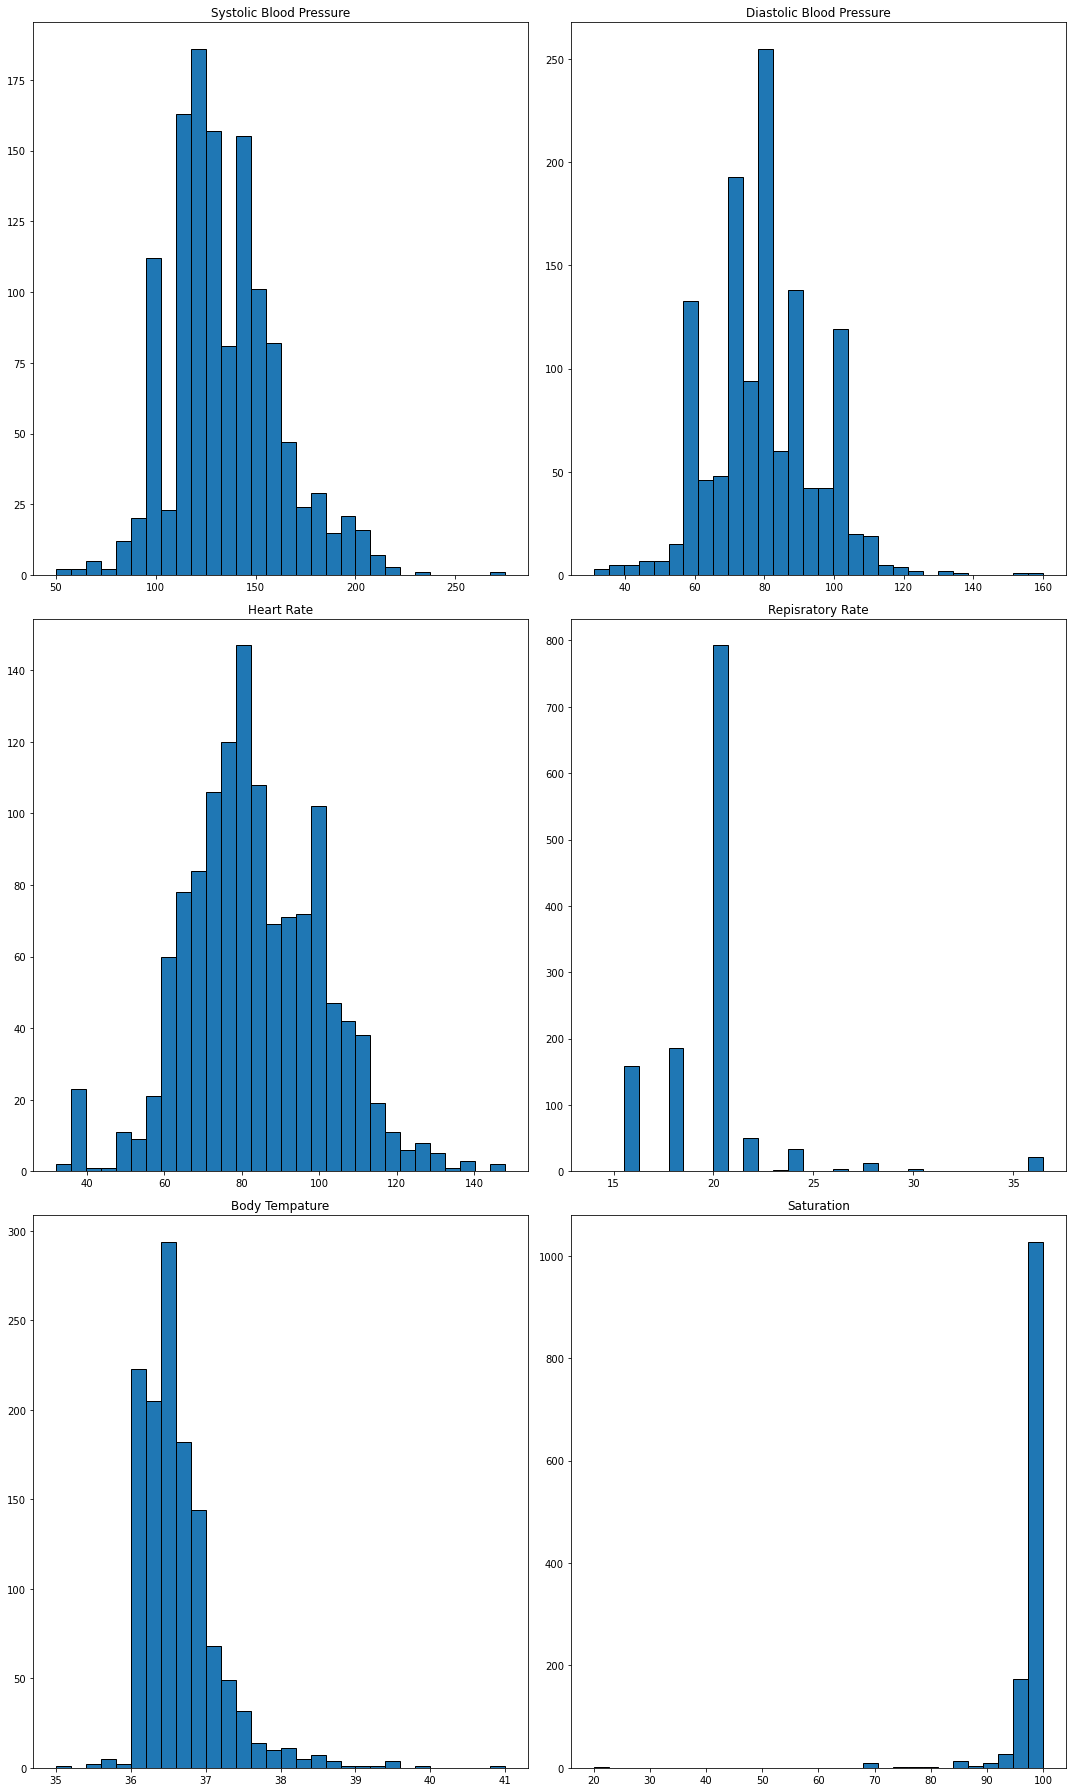

In [194]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 2, figsize=(15, 25))

ax[0, 0].hist(df['SBP'], bins=30, edgecolor='black') 
ax[0, 0].set_title('Systolic Blood Pressure')

ax[0, 1].hist(df['DBP'], bins=30, edgecolor='black') 
ax[0, 1].set_title('Diastolic Blood Pressure')

ax[1, 0].hist(df['HR'], bins=30, edgecolor='black') 
ax[1, 0].set_title('Heart Rate')

ax[1, 1].hist(df['RR'], bins=30, edgecolor='black') 
ax[1, 1].set_title('Repisratory Rate')

ax[2, 0].hist(df['BT'], bins=30, edgecolor='black') 
ax[2, 0].set_title('Body Tempature')

ax[2, 1].hist(df['Saturation'], bins=30, edgecolor='black') 
ax[2, 1].set_title('Saturation')

plt.tight_layout()
plt.show()


In [195]:
from sklearn.preprocessing import StandardScaler


In [196]:
# Scale the columns
scaler = StandardScaler()
df[['SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturation','Age']] = scaler.fit_transform(df[['SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturation','Age']])


In [197]:
df.head()

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
0,2,1,0.840694,3,3,2,right ocular pain,1,1,2,...,0.037883,0.699964,2,Corneal abrasion,0,4,2,86,"5,00",1
1,1,0,0.079938,12,3,2,right forearm burn,1,1,2,...,-0.146726,0.187331,4,"Burn of hand, firts degree dorsum",0,5,4,64,"3,95",1
2,2,0,0.688543,8,2,2,"arm pain, Lt",1,1,2,...,0.037883,0.187331,4,"Fracture of surgical neck of humerus, closed",1,5,4,862,"1,00",1
3,1,1,0.840694,8,1,1,ascites tapping,1,1,3,...,-0.146726,0.187331,4,Alcoholic liver cirrhosis with ascites,0,5,6,108,"9,83",1
4,1,1,0.181372,4,3,1,"distension, abd",1,1,3,...,-0.146726,0.187331,4,Ascites,0,5,8,109,"6,60",1


In [198]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [199]:
df.columns

Index(['Group', 'Sex', 'Age', 'Patients number per hour', 'Arrival mode',
       'Injury', 'Chief_complain', 'Mental', 'Pain', 'NRS_pain', 'SBP', 'DBP',
       'HR', 'RR', 'BT', 'Saturation', 'KTAS_RN', 'Diagnosis in ED',
       'Disposition', 'KTAS_expert', 'Error_group', 'Length of stay_min',
       'KTAS duration_min', 'mistriage'],
      dtype='object')

In [200]:
#choose the new df with selected variables
df_modified=df[['Sex', 'Age','Arrival mode','Injury','Mental', 'Pain', 'NRS_pain', 'SBP', 'DBP',
       'HR', 'RR', 'BT', 'Saturation', 'KTAS_RN']]

In [201]:
# Separate the y variable, the labels
y = df_modified["KTAS_RN"]

# Separate the X variable, the features
X = df_modified.drop(columns="KTAS_RN")
X = pd.get_dummies(X)

df_modified['NRS_pain'] = df_modified['NRS_pain'].astype(int)
df_modified.dtypes

C:\Users\deonj\anaconda3\envs\PythonStuff\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Sex               int64
Age             float64
Arrival mode      int64
Injury            int64
Mental            int64
Pain              int64
NRS_pain          int32
SBP             float64
DBP             float64
HR              float64
RR              float64
BT              float64
Saturation      float64
KTAS_RN           int64
dtype: object

In [202]:
print(y.value_counts())
#[1,2,3 = Emergency, 4,5 = Non-Emergency]

4    501
3    447
2    214
5     87
1     18
Name: KTAS_RN, dtype: int64


In [203]:
print(y)

0       2
1       4
2       4
3       4
4       4
       ..
1262    2
1263    4
1264    3
1265    3
1266    3
Name: KTAS_RN, Length: 1267, dtype: int64


In [204]:
X.head()

,Sex,Age,Arrival mode,Injury,Mental,Pain,SBP,DBP,HR,RR,...,NRS_pain_1,NRS_pain_10,NRS_pain_2,NRS_pain_3,NRS_pain_4,NRS_pain_5,NRS_pain_6,NRS_pain_7,NRS_pain_8,NRS_pain_9
0,1,0.840694,3,2,1,1,0.978664,1.342617,0.044834,-0.603315,...,0,0,1,0,0,0,0,0,0,0
1,0,0.079938,3,2,1,1,0.126784,-0.307061,-1.323953,0.066330,...,0,0,1,0,0,0,0,0,0,0
2,0,0.688543,2,2,1,1,-0.132484,0.022874,1.071424,0.066330,...,0,0,1,0,0,0,0,0,0,0
3,1,0.840694,1,1,1,1,0.200860,0.946694,0.272965,0.066330,...,0,0,0,1,0,0,0,0,0,0
4,1,0.181372,3,1,1,1,-1.576977,-0.834958,0.558129,-0.603315,...,0,0,0,1,0,0,0,0,0,0


In [205]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

In [206]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', random_state=1)
# Fit the model using training data
classifier.fit(X_train,y_train)

C:\Users\deonj\anaconda3\envs\PythonStuff\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=1)

In [207]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
511,4,4
37,3,2
1256,3,3
178,3,4
799,3,3
...,...,...
752,4,3
861,3,4
522,3,3
451,3,4


In [208]:
print( f'accuracy score of the model is : {accuracy_score(y_test, predictions)}')


accuracy score of the model is : 0.5362776025236593


In [209]:
# Generate a confusion matrix for the model
test_matrix = confusion_matrix(y_test, predictions)
test_matrix

array([[ 3,  1,  0,  0,  0],
       [ 2, 12, 25, 15,  0],
       [ 0,  4, 85, 23,  0],
       [ 0,  4, 51, 70,  0],
       [ 0,  1, 14,  7,  0]], dtype=int64)

In [210]:
# Print the classification report for the model
testing_report = classification_report(y_test, predictions)
print(testing_report)

              precision    recall  f1-score   support

           1       0.60      0.75      0.67         4
           2       0.55      0.22      0.32        54
           3       0.49      0.76      0.59       112
           4       0.61      0.56      0.58       125
           5       0.00      0.00      0.00        22

    accuracy                           0.54       317
   macro avg       0.45      0.46      0.43       317
weighted avg       0.51      0.54      0.50       317



C:\Users\deonj\anaconda3\envs\PythonStuff\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deonj\anaconda3\envs\PythonStuff\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deonj\anaconda3\envs\PythonStuff\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [211]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = model.predict(X_test)

# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5511811023622047
Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.80      0.80         5
           2       0.83      0.32      0.46        47
           3       0.50      0.73      0.60        82
           4       0.55      0.65      0.59        92
           5       0.50      0.04      0.07        28

    accuracy                           0.55       254
   macro avg       0.64      0.51      0.50       254
weighted avg       0.59      0.55      0.52       254



In [212]:
#Logistic Reg + Over sampling

from imblearn.over_sampling import SMOTE

# Separate the y variable, the labels
y = df_modified["KTAS_RN"]

# Separate the X variable, the features
X = df_modified.drop(columns="KTAS_RN")

# Perform oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Instantiate the logistic regression model
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = model.predict(X_test)

# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5229540918163673
Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.90      0.85        99
           2       0.54      0.39      0.45       116
           3       0.35      0.31      0.33        94
           4       0.53      0.52      0.52        97
           5       0.38      0.52      0.44        95

    accuracy                           0.52       501
   macro avg       0.52      0.53      0.52       501
weighted avg       0.52      0.52      0.52       501



In [213]:
#Oversampling + Random Forest

# Separate the y variable, the labels
y = df_modified["KTAS_RN"]

# Separate the X variable, the features
X = df_modified.drop(columns="KTAS_RN")

# Perform oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Instantiate the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = model.predict(X_test)

# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7844311377245509
Classification Report:
               precision    recall  f1-score   support

           1       0.96      1.00      0.98        99
           2       0.78      0.84      0.81       116
           3       0.59      0.61      0.60        94
           4       0.74      0.57      0.64        97
           5       0.83      0.88      0.86        95

    accuracy                           0.78       501
   macro avg       0.78      0.78      0.78       501
weighted avg       0.78      0.78      0.78       501



In [214]:
from joblib import dump
dump(model, 'model.joblib')

['model.joblib']